### Vision Transformer(VIT) 기반 모델 Fine Tuning
- google brain의 연구팀이 2021년에 발표
- 처리방법  
  1.원본 이미지를 격자형태로 쪼개 서브 이미지를 만든다.  
  2.쪼개진 이미지를 선형으로 투영한다.  
  3.투영된 데이터를 자연어처리하는 것처럼 ViT모델에 입력으로 활용한다.
  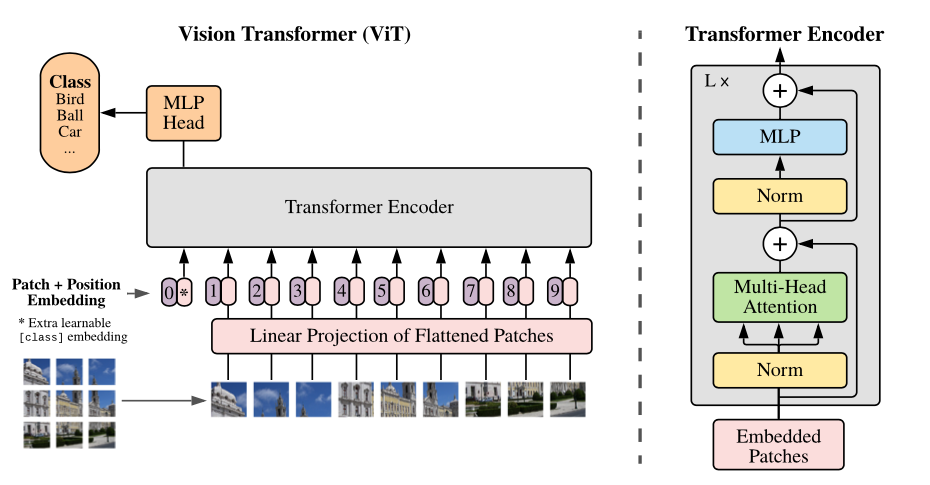  

### 0. 환경구축

In [ ]:
# 관련 라이브러리 설치
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
!pip install accelerate -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
!pip install python-dotenv

In [4]:
import os
from dotenv import load_dotenv

In [7]:
load_dotenv()

True

In [8]:
token = os.getenv('HUGGINGFACE_TOKEN')

### 1. 학습데이터 로딩

#### 허깅페이스에서 콩잎의 건강상태를 분류하는 데이터셋 다운

In [ ]:
from datasets import load_dataset

In [ ]:
ds = load_dataset('AI-Lab-Makerere/beans')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.95k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/144M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/18.5M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1034 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/133 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/128 [00:00<?, ? examples/s]

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})

In [ ]:
ds['train']

Dataset({
    features: ['image_file_path', 'image', 'labels'],
    num_rows: 1034
})

In [ ]:
ds['validation'][100]

{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/ebfc96c159ae45a2d4ea69f80c256fd9699dd4695defa0c43f6c90f048632983/validation/healthy/healthy_val.19.jpg',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500>,
 'labels': 2}

In [ ]:
ds['validation'][100]['labels']

2

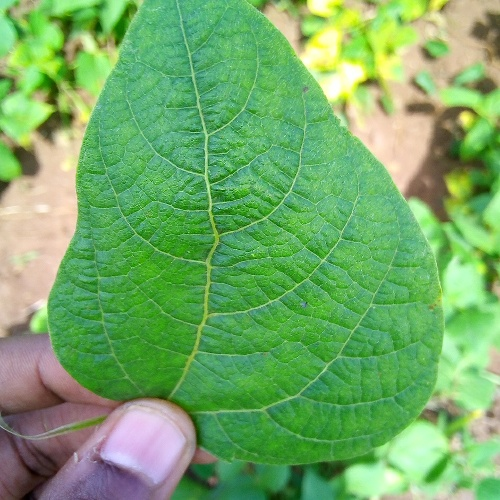

In [ ]:
ds['validation'][100]['image']

### 2. 이미지 전처리
- 이미지 사이즈 맞추기
- 색상데이터의 스케일링(범위조정 0~1)

In [ ]:
from transformers import ViTFeatureExtractor

In [ ]:
model_name = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


#### 이미지 한 장 전처리

In [ ]:
feature_extractor(ds['validation'][5]['image'])

{'pixel_values': [array([[[ 0.30980396,  0.33333337,  0.3176471 , ...,  0.20000005,
          0.20784318,  0.24705887],
        [ 0.3176471 ,  0.30980396,  0.28627455, ...,  0.24705887,
          0.23921573,  0.2313726 ],
        [ 0.30980396,  0.27843142,  0.2313726 , ...,  0.27058828,
          0.2941177 ,  0.27843142],
        ...,
        [-0.02745098,  0.05882359,  0.12941182, ..., -0.52156866,
         -0.11372548, -0.4352941 ],
        [-0.05098039,  0.0196079 ,  0.09019613, ..., -0.64705884,
         -0.20784312, -0.17647058],
        [-0.09019607, -0.01960784,  0.05882359, ..., -0.6862745 ,
         -0.372549  ,  0.00392163]],

       [[ 0.4901961 ,  0.49803925,  0.48235297, ..., -0.1607843 ,
         -0.15294117, -0.11372548],
        [ 0.4901961 ,  0.47450984,  0.43529415, ..., -0.11372548,
         -0.12156862, -0.12941176],
        [ 0.47450984,  0.4431373 ,  0.35686278, ..., -0.08235294,
         -0.05882353, -0.0745098 ],
        ...,
        [-0.24705881, -0.17647058, -

#### 많은 데이터를 모아서 전처리되는 사용자 정의 함수 구현

In [ ]:
def transform(example_batch) :
  inputs = feature_extractor(example_batch['image'], return_tensors='pt')
  inputs['labels'] = example_batch['labels']

  return inputs

#### 전체 데이터에 전처리 함수 적용

In [ ]:
prepared_ds = ds.with_transform(transform)

In [ ]:
prepared_ds['validation'][5]

{'pixel_values': tensor([[[ 0.3098,  0.3333,  0.3176,  ...,  0.2000,  0.2078,  0.2471],
          [ 0.3176,  0.3098,  0.2863,  ...,  0.2471,  0.2392,  0.2314],
          [ 0.3098,  0.2784,  0.2314,  ...,  0.2706,  0.2941,  0.2784],
          ...,
          [-0.0275,  0.0588,  0.1294,  ..., -0.5216, -0.1137, -0.4353],
          [-0.0510,  0.0196,  0.0902,  ..., -0.6471, -0.2078, -0.1765],
          [-0.0902, -0.0196,  0.0588,  ..., -0.6863, -0.3725,  0.0039]],
 
         [[ 0.4902,  0.4980,  0.4824,  ..., -0.1608, -0.1529, -0.1137],
          [ 0.4902,  0.4745,  0.4353,  ..., -0.1137, -0.1216, -0.1294],
          [ 0.4745,  0.4431,  0.3569,  ..., -0.0824, -0.0588, -0.0745],
          ...,
          [-0.2471, -0.1765, -0.1216,  ..., -0.2549,  0.1294, -0.1843],
          [-0.2627, -0.1922, -0.1373,  ..., -0.3725,  0.0353,  0.0588],
          [-0.3020, -0.2314, -0.1608,  ..., -0.3961, -0.1216,  0.2392]],
 
         [[ 0.1765,  0.1843,  0.1529,  ..., -0.3020, -0.2863, -0.2392],
          [ 

### 3. 학습 및 검증

#### 사전학습 및 모델 다운로드

In [ ]:
from transformers import ViTForImageClassification

In [ ]:
model = ViTForImageClassification.from_pretrained(
    model_name,
    num_labels = 3
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#### 학습 파라미터 클래스 생성

In [ ]:
from transformers import TrainingArguments

In [ ]:
batch_size = 64

# 학습파라미터 클래스 생성
args = TrainingArguments(
    learning_rate=2e-5, # 학습률
    per_device_train_batch_size = batch_size, # 훈련시 배치사이즈 설정
    per_device_eval_batch_size = batch_size, # 검증시 배치사이즈 설정
    num_train_epochs = 3, # 학습 횟수 설정
    output_dir = "./ViT_beans", # 학습결과가 저장될 경로(모델 체크포인트 같은 역할)
    run_name = "beans",
    save_strategy="epoch", # 매번 에포크 마다 파일 저장
    load_best_model_at_end = True, # 학습 종료시 베스트모델 로딩
    greater_is_better=True, # 베스트 모델 저장
    eval_strategy = "epoch", # 매번 에포크 마다 검증결과 출력
    remove_unused_columns=False
)

#### 학습을 시켜주는 클래스

In [ ]:
from transformers import Trainer

#### 데이터를 넣어주는 함수

In [ ]:
import torch

def collate_fn(batch) :
  return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
  }

#### 학습 트레이너 클래스 생성


In [ ]:
trainer = Trainer(
    model = model, # 파인튜닝할 모델
    args = args, # 학습방법 클래스(설정값)
    train_dataset = prepared_ds['train'], # 훈련용 데이터 연결
    eval_dataset = prepared_ds['validation'], # 검증용 데이터 연결
    processing_class = feature_extractor # 전처리 도구
)

#### 학습 실시

In [ ]:
trainer.train()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: yeongmin4305 (yeongmin4305-chonnam-national-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,No log,0.783875
2,No log,0.624471
3,No log,0.570265


TrainOutput(global_step=51, training_loss=0.7384832045611214, metrics={'train_runtime': 217.0261, 'train_samples_per_second': 14.293, 'train_steps_per_second': 0.235, 'total_flos': 2.4038230623573197e+17, 'train_loss': 0.7384832045611214, 'epoch': 3.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.7838745713233948,
 'eval_runtime': 3.6827,
 'eval_samples_per_second': 36.115,
 'eval_steps_per_second': 0.815,
 'epoch': 3.0}

#### 정확도로 평가지표 확인

In [ ]:
# 예측 값 추출
pre = trainer.predict(prepared_ds['test'])

In [ ]:
pre.predictions

array([[ 4.41219002e-01, -8.60401317e-02, -4.55451936e-01],
       [ 4.84308541e-01,  1.04226679e-01, -4.02864605e-01],
       [ 5.37440777e-01, -7.76517242e-02, -4.07040566e-01],
       [ 5.41282415e-01, -1.64824292e-01, -6.46284938e-01],
       [ 5.64067483e-01, -2.75441371e-02, -2.23664910e-01],
       [ 2.67265230e-01,  3.60245146e-02, -3.27318698e-01],
       [ 3.68191823e-02,  3.14891458e-01, -3.88518840e-01],
       [ 4.84638453e-01,  1.08211555e-01, -3.62761706e-01],
       [ 4.38566566e-01, -1.62909135e-01, -5.40206015e-01],
       [ 5.00328600e-01, -1.99829936e-02, -4.30847913e-01],
       [ 4.00933623e-01, -6.78554922e-02, -3.47051919e-01],
       [-1.01512894e-01,  1.20747671e-01, -1.44406512e-01],
       [ 3.68873298e-01,  5.26456423e-02, -3.88538927e-01],
       [ 3.56451094e-01,  5.49646579e-02, -1.93747312e-01],
       [ 4.51368928e-01, -1.40516122e-03, -2.88942546e-01],
       [ 4.63936657e-01,  1.67408995e-02, -3.12536955e-01],
       [ 2.19656304e-01,  2.76375115e-01

#### 모델의 예측 값(확률을 클래스 번호로 변경한 결과)

In [ ]:
pre.predictions.argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2])

#### 실제 정답 데이터

In [ ]:
pre.label_ids

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### 정확도 계산

In [ ]:
from sklearn.metrics import classification_report

#### classification_report(실제정답, 모델예측값)

In [ ]:
print(classification_report(pre.label_ids, pre.predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77        43
           1       0.85      0.67      0.75        43
           2       0.98      0.95      0.96        42

    accuracy                           0.83       128
   macro avg       0.84      0.83      0.83       128
weighted avg       0.84      0.83      0.83       128



### 4. 모델 활용

#### 허깅페이스 로그인

In [9]:
import huggingface_hub
huggingface_hub.login(token)

#### 저장소에 업로드 시 함께 기입할 정보 작성

In [ ]:
kwargs = {
    "finetuned_from": model.config._name_or_path, # Fine-Tuning한 사전학습모델 정보
    "tasks": "image-classification", # Task 종류표기
    "dataset": "beans", # 활용한 Dataset 표기
    "tags": ["JYM", "3_class", "ViT"] # 기타정보 표기
}

#### 허깅페이스 업로드

In [ ]:
trainer.push_to_hub('zeromin-03', **kwargs)

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

events.out.tfevents.1744244587.6aa4378633e5.197.0:   0%|          | 0.00/6.25k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

events.out.tfevents.1744245914.6aa4378633e5.197.1:   0%|          | 0.00/354 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/zeromin-03/ViT_beans/commit/390f1ec2eecd9946aae042a82c0d1bf85e33f7b1', commit_message='zeromin-03', commit_description='', oid='390f1ec2eecd9946aae042a82c0d1bf85e33f7b1', pr_url=None, repo_url=RepoUrl('https://huggingface.co/zeromin-03/ViT_beans', endpoint='https://huggingface.co', repo_type='model', repo_id='zeromin-03/ViT_beans'), pr_revision=None, pr_num=None)

#### 업로드한 모델 활용하기

In [ ]:
from transformers import pipeline

In [ ]:
콩잎분류모델 = pipeline(task = 'image-classification', model = 'zeromin-03/ViT_beans')

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Device set to use cuda:0


In [ ]:
콩잎분류모델(ds['test'][0]['image'])

[{'label': 'LABEL_0', 'score': 0.5004639625549316},
 {'label': 'LABEL_1', 'score': 0.2953840494155884},
 {'label': 'LABEL_2', 'score': 0.2041519582271576}]

In [ ]:
콩잎분류모델('https://poison-ivy.org/wp-content/uploads/2023/07/bean-plant.jpg')

[{'label': 'LABEL_1', 'score': 0.35731223225593567},
 {'label': 'LABEL_0', 'score': 0.33182790875434875},
 {'label': 'LABEL_2', 'score': 0.3108597695827484}]